In [1]:
import serial
import time
import re

In [2]:
# function for the clock
def current_time_millis():
    return int(round(time.time() * 1000))

# function to avoid messy serial data
def is_numeric_string(s):
    # regex to match a string that contains only digits
    pattern = r'^\d+$'
    
    if re.match(pattern, s):
        return True
    else:
        return False

In [5]:
arduino_port = "COM4"
baud_rate = 9600  

ser = serial.Serial(arduino_port, baud_rate, timeout=1)

time.sleep(1)

tap_data = []
time_data = []
start_time = current_time_millis()

try:
    while True:
        # Reading one line from serial
        if ser.in_waiting > 0:
            # getting the time data
            current_millis = current_time_millis()
            elapsed_time = current_millis - start_time

            # getting the tap data
            line = ser.readline().decode('utf-8').rstrip()

            # checking if the tap data is numeric using reg exp
            if is_numeric_string(line) is True:
                print(str(elapsed_time) + "," + str(line))

                # storing the data
                tap_data.append(line)
                time_data.append(elapsed_time)

            # adding delay to avoid overflow
            time.sleep(0.001)
            
except KeyboardInterrupt:
    print("Exiting Program")

finally:
    ser.close()


568,377
577,385
583,382
587,378
595,387
600,380
606,381
612,374
617,386
624,376
628,376
634,385
640,378
647,384
653,380
657,386
665,381
669,377
675,386
681,373
687,381
694,375
698,383
703,381
710,377
717,386
722,386
727,370
735,377
739,381
745,375
751,382
757,387
763,376
768,379
773,386
780,373
786,382
792,383
799,385
804,385
808,377
815,383
821,375
827,383
833,374
837,386
842,386
849,371
856,386
862,380
867,380
874,376
878,387
884,377
890,377
897,386
903,378
907,380
914,380
919,374
925,382
931,380
937,389
943,383
948,377
953,379
960,379
967,380
972,380
976,388
981,381
989,377
995,381
1001,384
1007,379
1013,380
1018,388
1023,382
1030,370
1036,386
1042,376
1046,384
1053,380
1059,385
1065,374
1070,376
1077,386
1083,384
1087,380
1092,383
1100,378
1106,381
1111,379
1116,387
1122,380
1128,373
1134,386
1140,382
1147,385
1153,383
1157,387
1163,385
1169,385
1176,390
1181,383
1189,10000
1207,10000
1225,10000
1237,10000
1252,10000
1259,10000
1280,10000
1288,2002
1296,384
1300,384
1304,390
1312,3

In [6]:
# converting tap data to int 
tap_data = [int(num) for num in tap_data]

print(len(tap_data)) 
print(len(time_data)) 

3246
3246


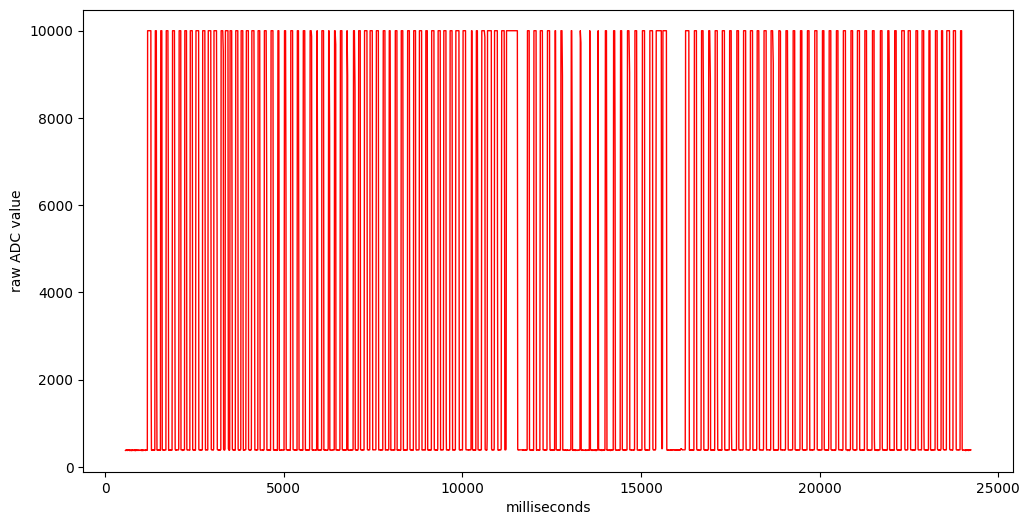

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))  
plt.plot(time_data, tap_data, lw = 1.0, color = 'r')
plt.xlabel('milliseconds')
plt.ylabel('raw ADC value')
plt.show()

### Saving the participant data

In [13]:
import pandas as pd
data = {'tap_data': tap_data, 'time_data': time_data}
df = pd.DataFrame(data)
print(df)

      tap_data  time_data
0          355        566
1          355        581
2          353        583
3          360        588
4          359        594
...        ...        ...
3574       364      26288
3575       376      26293
3576       366      26298
3577       360      26305
3578       360      26312

[3579 rows x 2 columns]


In [14]:
df.to_csv('test_data.csv', index=False)

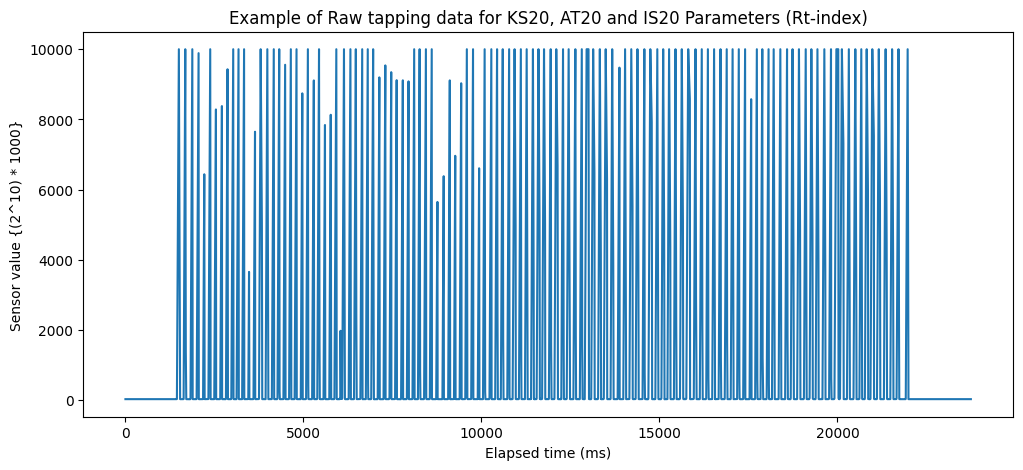

In [51]:
# import pandas as pd
# from matplotlib import pyplot as plt

# df = pd.read_csv("subj_1_data_index.csv")
# plt.figure(figsize=(12, 5))
# plt.plot(df["time_data"], df["tap_data"])
# plt.xlabel("Elapsed time (ms)")
# plt.ylabel("Sensor value {(2^10) * 1000}")
# plt.title("Example of Raw tapping data for KS20, AT20 and IS20 Parameters (Rt-index)")
# plt.savefig("fig_1.jpg")
# plt.show()

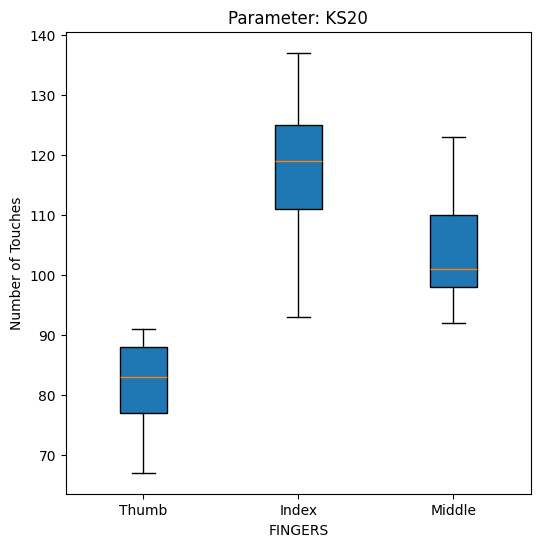

In [52]:
import seaborn as sns

ks20_thumb = [88, 90, 73, 83, 91, 67, 77, 80, 85]
ks20_index = [117, 133, 111, 125, 121, 137, 93, 105, 119]
ks20_middle = [105, 92, 110, 101, 123, 100, 95, 117, 98]

data = [ks20_thumb, ks20_index, ks20_middle]

fig, ax = plt.subplots(figsize = (6,6))
# Plot the data
ax.boxplot(data, patch_artist=True)
# Set x-axis labels
ax.set_xticklabels(['Thumb', 'Index', 'Middle'])
ax.set_xlabel("FINGERS")
ax.set_ylabel("Number of Touches")
ax.set_title("Parameter: KS20")

plt.savefig('boxplot_KS20.png', dpi=300)  # Adjust the filename and DPI as needed

# Display the plot
plt.show()

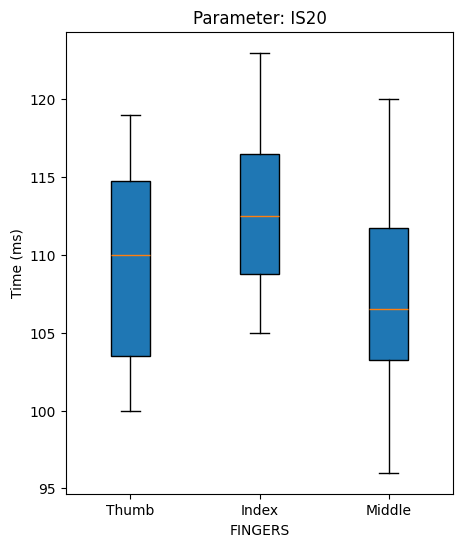

In [53]:
import seaborn as sns

IS20_thumb = [119, 100, 111, 109, 105, 102, 115, 115, 103, 114]
IS20_index = [112, 108, 111, 106, 123, 117, 118, 115, 105, 113]
IS20_middle = [107, 100, 103, 106, 111, 115, 112, 120, 96, 104]

data = [IS20_thumb, IS20_index, IS20_middle]

fig, ax = plt.subplots(figsize = (5,6))
# Plot the data
ax.boxplot(data, patch_artist=True)
# Set x-axis labels
ax.set_xticklabels(['Data 1', 'Data 2', 'data 3'])

ax.set_xticklabels(['Thumb', 'Index', 'Middle'])
ax.set_xlabel("FINGERS")
ax.set_ylabel("Time (ms)")
ax.set_title("Parameter: IS20")

plt.savefig('boxplot_IS20.png', dpi=300)  # Adjust the filename and DPI as needed

# Display the plot
plt.show()

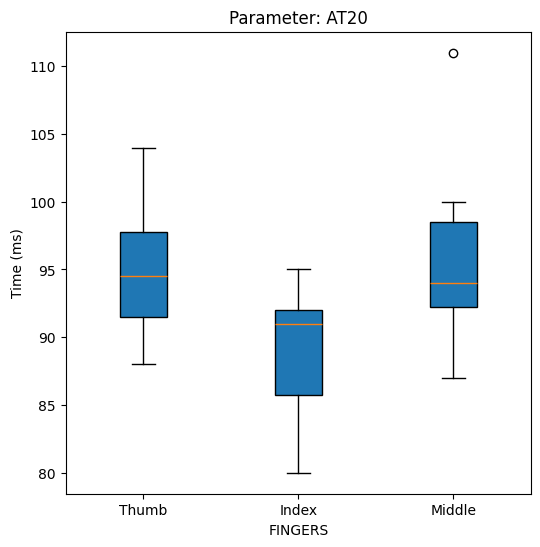

In [54]:
import seaborn as sns

AT20_thumb = [97, 88, 93, 104, 95, 94, 98, 91, 100, 89]
AT20_index = [92, 88, 80, 91, 95, 83, 94, 91, 85, 92]
AT20_middle = [87, 91, 111, 93, 95, 99, 92, 97, 100, 93]

data = [AT20_thumb, AT20_index, AT20_middle]

fig, ax = plt.subplots(figsize = (6,6))
# Plot the data
ax.boxplot(data, patch_artist=True)
# Set x-axis labels
ax.set_xticklabels(['Thumb', 'Index', 'Middle'])
ax.set_xlabel("FINGERS")
ax.set_ylabel("Time (ms)")
ax.set_title("Parameter: AT20")

plt.savefig('boxplot_AT20.png', dpi=300)  # Adjust the filename and DPI as needed

# Display the plot
plt.show()